In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

In [2]:
train_data=pd.read_csv("House.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [4]:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

In [5]:
train_data["SalePrice"].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [6]:
del train_data['Id']

In [7]:

# I hate missing values lets get rid of them :
train_data.columns
mis_info={}
for col in train_data.columns:
    mis_count=len(train_data[train_data[col].isnull()])
    if mis_count!=0:
        mis_info[col]=mis_count
    

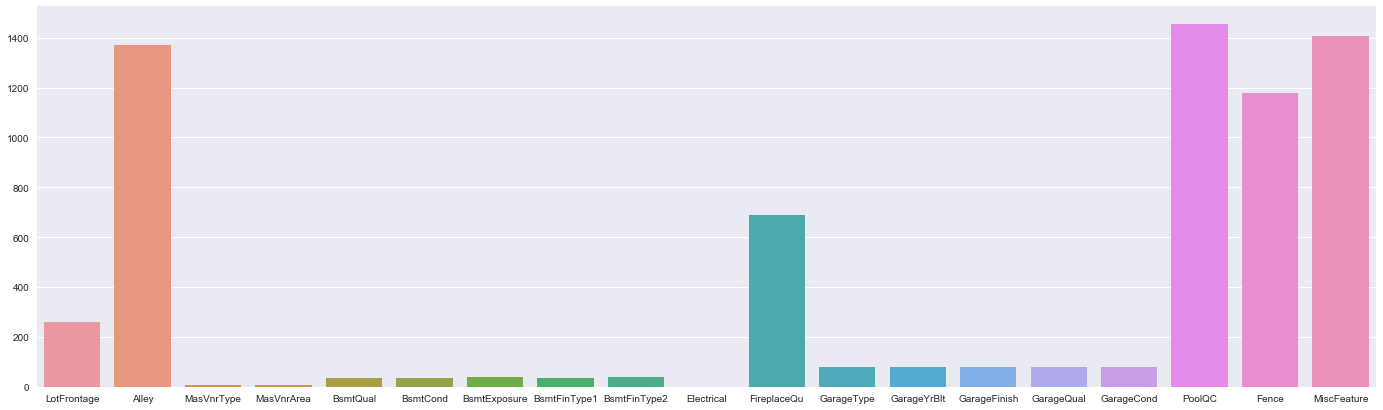

In [8]:
x=list(mis_info.keys())
y=list(mis_info.values())

fig, (ax1)=  plt.subplots(1,1,figsize=(24,7))
sns.barplot(x=x,y=y,ax=ax1)


# handling missing values in each feature 1 by 1

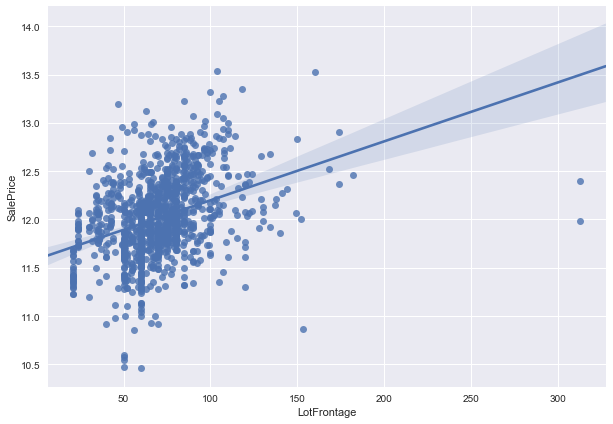

In [9]:
#Let's plot sale price against lot-frontage.
fig, (ax1)=  plt.subplots(1,1,figsize=(10,7))
sns.regplot(x=train_data["LotFrontage"],y=train_data["SalePrice"],ax=ax1)

In [10]:
#here we see that Sales Price has 2 huge outliers. so it won't be a good idea to fill the missing values with mean.median 
#will be a better approach
lot_median=train_data["LotFrontage"].median()
train_data["LotFrontage"]=train_data["LotFrontage"].fillna(lot_median)
print("Number of NAN in LotFrontage Column :",len(train_data[train_data['LotFrontage'].isnull()]))

Number of NAN in LotFrontage Column : 0


only 0.06232876712328767 Percent of Alley have non null values


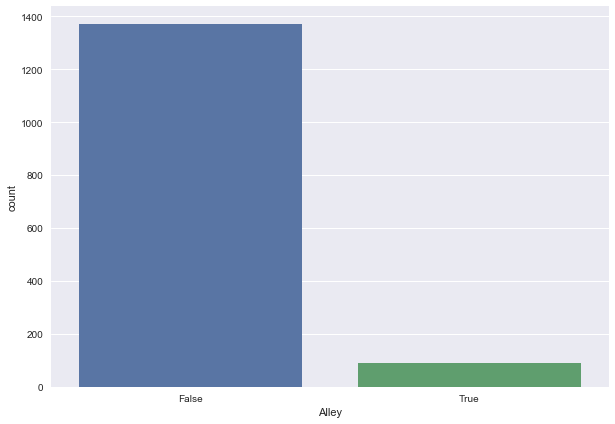

In [11]:
fig, (ax1)=  plt.subplots(1,1,figsize=(10,7))
sns.countplot(train_data['Alley'].notnull(),ax=ax1)
print("only",(len(train_data[train_data["Alley"].notnull()])/len(train_data["Alley"])),"Percent of Alley have non null values")

In [12]:
#this makes alley feature useless. lets delete it
del train_data["Alley"]

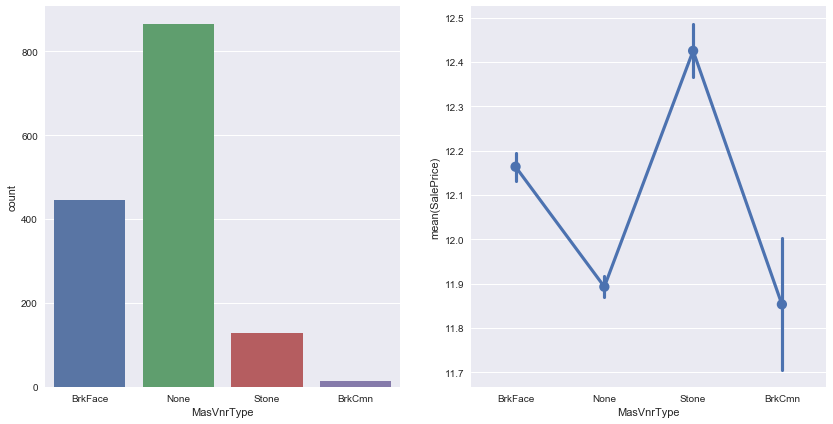

In [13]:
train_data['MasVnrType'].unique()
fig, (ax1,ax2)=  plt.subplots(1,2,figsize=(14,7))
sns.countplot(train_data['MasVnrType'],ax=ax1)
sns.factorplot(x='MasVnrType',y="SalePrice",data=train_data,ax=ax2)
plt.close(2)

MasVnrType is the type of wood layer (decorative fine layer) used. in case of None means no layer is used this means that there is no missing values in this columns. still i am interested in visualizing so graphs for these feature:

In [14]:
# just in case if values are missing fill them with none which means no vaneer
train_data['MasVnrType']=train_data['MasVnrType'].fillna('None')

We can see above that in terms of sale price house with stone vaneer > BrkFace > None > BrkCmn
hmmm!! None is better than Brcmn bit interesting :).
so no deletion from this categorical feature

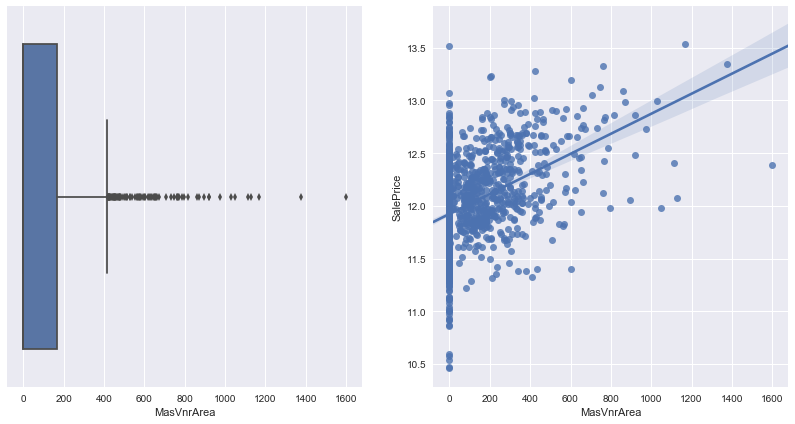

In [15]:
# MasVnrArea this feature also doesn't have any missing values but houses which don't have vaneer this area is 0. Lets see
# the distribution of this feature .
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(14,7))
sns.boxplot(train_data["MasVnrArea"],ax=ax1)
sns.regplot(x=train_data["MasVnrArea"],y=train_data['SalePrice'],ax=ax2)

In [16]:
# in case any NaN are there then fill the VnrArea with 0 , no vaneer no area
train_data["MasVnrArea"]=train_data['MasVnrArea'].fillna(0)

In [17]:
# all these Bsmt features are about basement , so if we have NaN is this fields that means those houses don't have basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_data[col] = train_data[col].fillna('None')

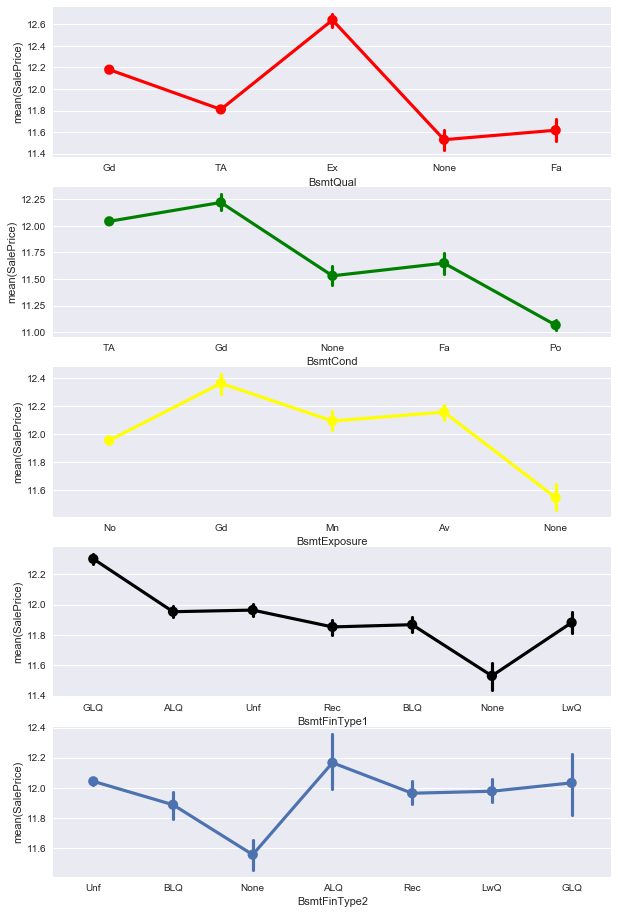

In [18]:
#lets plot factor plot to see how bsmt related features affects the price
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(10,16))
sns.factorplot(x='BsmtQual',y='SalePrice',data=train_data,ax=ax1,color='red')
sns.factorplot(x='BsmtCond',y='SalePrice',data=train_data,ax=ax2,color='green')
sns.factorplot(x='BsmtExposure',y='SalePrice',data=train_data,ax=ax3,color='yellow')
sns.factorplot(x='BsmtFinType1',y='SalePrice',data=train_data,ax=ax4,color='black')
sns.factorplot(x='BsmtFinType2',y='SalePrice',data=train_data,ax=ax5)
plt.close(5)
plt.close(4)
plt.close(3)
plt.close(2)
plt.close()

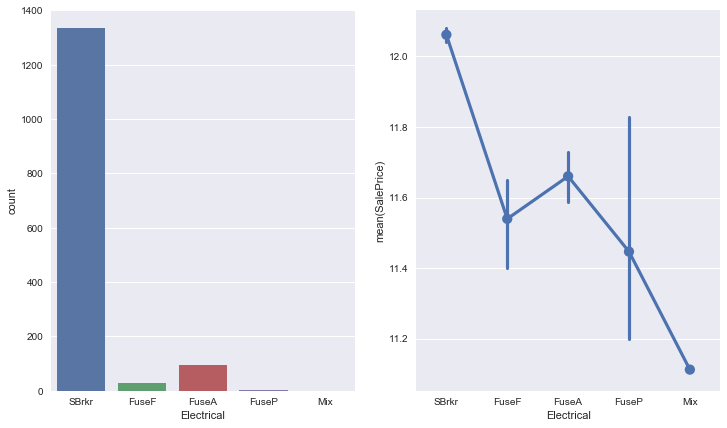

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,7))
sns.countplot(train_data['Electrical'],ax=ax1)
#print("Number of missing values",len(train_data[train_data['Electrical'].isnull()]))
sns.factorplot(x='Electrical',y="SalePrice",data=train_data,ax=ax2)
plt.close()

In [20]:
#lets see for missing values what is the SalePrice
print(train_data[train_data['Electrical'].isnull()])
#as we can see that sales price for missing values is 167500 which high. so as shown is plot above we will fill this missing values with "SBrkr
train_data['Electrical']=train_data['Electrical'].fillna('SBrkr')

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1379          80       RL         73.0     9735   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope    ...     PoolArea PoolQC Fence  \
1379    AllPub    Inside       Gtl    ...            0    NaN   NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1379         NaN       0       5    2008        WD         Normal  12.028745  

[1 rows x 79 columns]


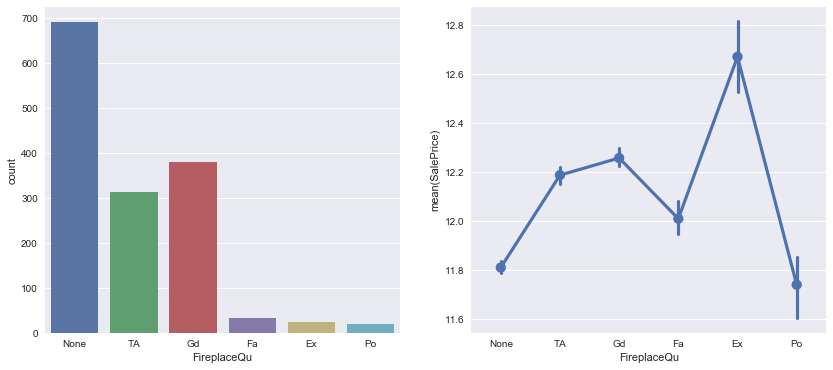

In [21]:
len(train_data[train_data['FireplaceQu'].isnull()])
# 690 values are missing , actually they are not missiing they null this means that no fireplace in the house
train_data["FireplaceQu"]=train_data['FireplaceQu'].fillna("None")
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,6))
sns.countplot(train_data['FireplaceQu'],ax=ax1)
sns.factorplot(x='FireplaceQu',y='SalePrice',data=train_data,ax=ax2)
plt.close()

so for 'Ex' the price is highest 

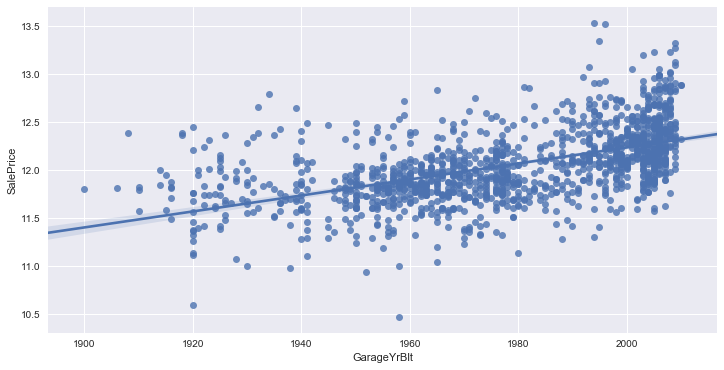

In [22]:
# Continuos Feature GarageYarBelt also has missing values
fig, (ax1)=plt.subplots(1,1,figsize=(12,6))
sns.regplot(x="GarageYrBlt",y="SalePrice",data=train_data,ax=ax1)

In [23]:
# Newer the garage better the price. for Nan in grageyrblt lets put 0 this means no garage
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(0)

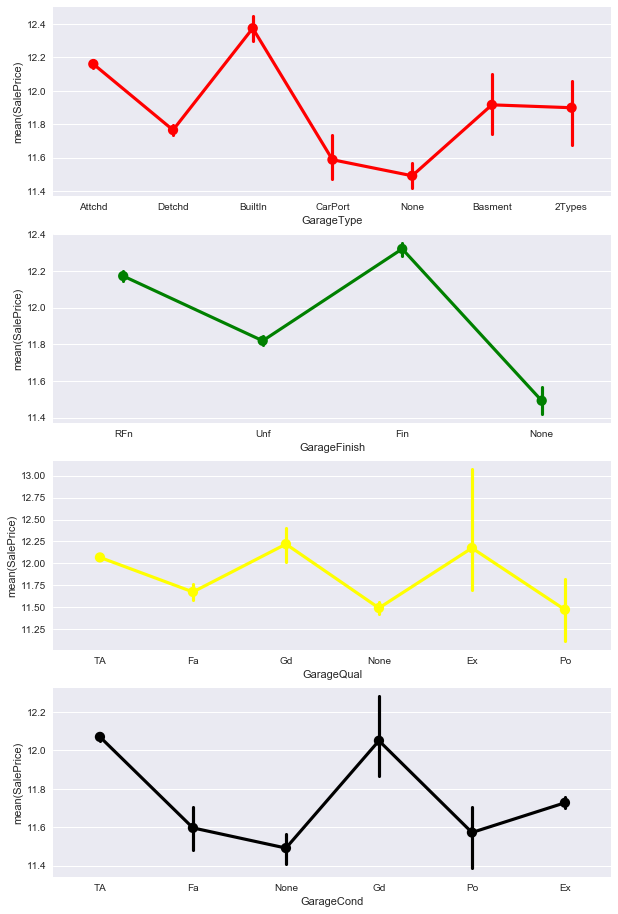

In [24]:
# not having garage means NaN, so filling this valuse with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_data[col] = train_data[col].fillna('None')
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(10,16))
sns.factorplot(x='GarageType',y='SalePrice',data=train_data,ax=ax1,color='red')
sns.factorplot(x='GarageFinish',y='SalePrice',data=train_data,ax=ax2,color='green')
sns.factorplot(x='GarageQual',y='SalePrice',data=train_data,ax=ax3,color='yellow')
sns.factorplot(x='GarageCond',y='SalePrice',data=train_data,ax=ax4,color='black')
plt.close(4)
plt.close(3)
plt.close(2)
plt.close()

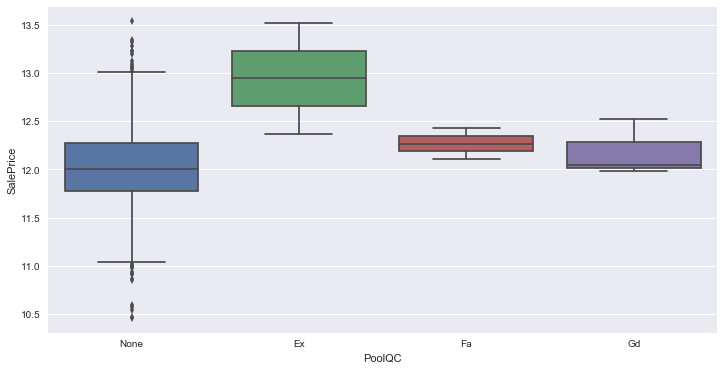

In [25]:
#no pool means this feature will have Nan
train_data["PoolQC"] = train_data["PoolQC"].fillna("None")
fig, (ax1)=plt.subplots(1,1,figsize=(12,6))
sns.boxplot(x='PoolQC',y='SalePrice',data=train_data,ax=ax1)

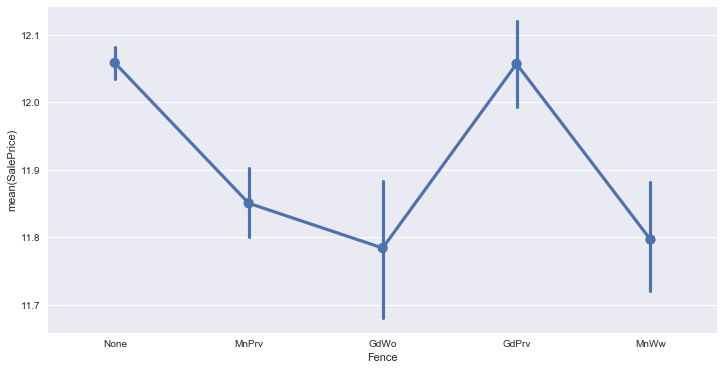

In [26]:
# nan means no face
train_data["Fence"] = train_data["Fence"].fillna("None")
fig, (ax1)=plt.subplots(1,1,figsize=(12,6))
sns.factorplot(x='Fence',y='SalePrice',data=train_data,ax=ax1)
plt.close()

it looks like houses with no fences have higher prices but it may because these houses have higher valuse for some other features such pool

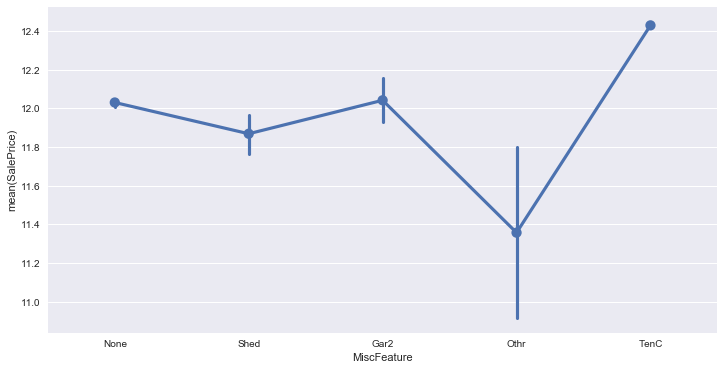

In [27]:
# no miscellenous features means Nan so we have done it earlier
train_data['MiscFeature']=train_data['MiscFeature'].fillna('None')
fig, (ax1)=plt.subplots(1,1,figsize=(12,6))
sns.factorplot(x='MiscFeature',y='SalePrice',data=train_data,ax=ax1)
plt.close()

looks like feature "TenC" is the costliest among all features

In [43]:
#train_data.info()

As we can see from above info that there is NaNs in our data set anymore so now we are ready to take next steps:

Let's  look at our categorical & numerical features saperately

In [29]:
catgorical=[]
numeric=[]
for typ,col in zip(train_data.dtypes,train_data.columns):
    if(typ=='object'):
        catgorical.append(col)
    else:
        numeric.append(col)

In [30]:
print(catgorical)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# Lets Identify ordinal features in our dataset.


In [31]:
for feature in catgorical:
    print(feature,"-Unique values:",train_data[feature].unique())

MSZoning -Unique values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street -Unique values: ['Pave' 'Grvl']
LotShape -Unique values: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour -Unique values: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities -Unique values: ['AllPub' 'NoSeWa']
LotConfig -Unique values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope -Unique values: ['Gtl' 'Mod' 'Sev']
Neighborhood -Unique values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 -Unique values: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 -Unique values: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType -Unique values: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle -Unique values: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle -Un

In [32]:
#from above output we can see that following features should be ordinal(categorical features where ordinality matters):
Ordinal_features=['LandSlop','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','BsmtExposure']
Nominal_features=[]
for feature in catgorical:
    if feature in Ordinal_features:
        continue
    else:
        Nominal_features.append(feature)

# Numeric Values to Ordinal Categorical Features

In [33]:
#LandSlop
print("before-Transformation",train_data["LandSlope"].unique())
train_data["LandSlope"] = train_data["LandSlope"].astype('category', ordered=True, categories=['Gt1', 'Mod', 'Sev']).cat.codes
print("After-Transformation",train_data["LandSlope"].unique())

before-Transformation ['Gtl' 'Mod' 'Sev']
After-Transformation [-1  1  2]


In [34]:
#ExterCond
print("before-Transformation",train_data["BsmtExposure"].unique())
#from below graph we can have an understanding that order in this feature is like"PO<FA<GD<TA<EX"
#lets do numeric transformation
train_data["BsmtExposure"] = train_data["BsmtExposure"].astype('category', ordered=True, categories=['None','No','Mn','Av','Gd']).cat.codes
print("After-Transformation",train_data["BsmtExposure"].unique())

before-Transformation ['No' 'Gd' 'Mn' 'Av' 'None']
After-Transformation [1 4 2 3 0]


In [35]:
Ordinal_features.pop(0)
Ordinal_features.pop(len(Ordinal_features)-1)

'BsmtExposure'

In [36]:
for feature in Ordinal_features:
    print("before-Transformation",feature,":",train_data[feature].unique())
    #from below graph we can have an understanding that order in this feature is like"PO<FA<GD<TA<EX"
    #lets do numeric transformation
    train_data[feature] = train_data[feature].astype('category', ordered=True, categories=['None','Po','Fa','TA','Gd','Ex']).cat.codes
    print("After-Transformation",train_data[feature].unique())
    

before-Transformation ExterQual : ['Gd' 'TA' 'Ex' 'Fa']
After-Transformation [4 3 5 2]
before-Transformation ExterCond : ['TA' 'Gd' 'Fa' 'Po' 'Ex']
After-Transformation [3 4 2 1 5]
before-Transformation BsmtQual : ['Gd' 'TA' 'Ex' 'None' 'Fa']
After-Transformation [4 3 5 0 2]
before-Transformation BsmtCond : ['TA' 'Gd' 'None' 'Fa' 'Po']
After-Transformation [3 4 0 2 1]
before-Transformation HeatingQC : ['Ex' 'Gd' 'TA' 'Fa' 'Po']
After-Transformation [5 4 3 2 1]
before-Transformation KitchenQual : ['Gd' 'TA' 'Ex' 'Fa']
After-Transformation [4 3 5 2]
before-Transformation FireplaceQu : ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
After-Transformation [0 3 4 2 5 1]
before-Transformation GarageQual : ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
After-Transformation [3 2 4 0 5 1]
before-Transformation GarageCond : ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
After-Transformation [3 2 0 4 1 5]
before-Transformation PoolQC : ['None' 'Ex' 'Fa' 'Gd']
After-Transformation [0 5 2 4]


# Numerical values to nominal categorical features Usind get_dummies:

In [37]:
train_data=pd.get_dummies(train_data)

# In order to make sure that our input features are independent we need to delete 1 dummy feature created for categrical features (avoding dummpy variable trap http://www.algosome.com/articles/dummy-variable-trap-regression.html )

In [38]:
train_data.drop(['MSZoning_FV','Street_Grvl','LotShape_IR1','LandContour_Bnk','Utilities_AllPub','LotConfig_Corner','Neighborhood_BrDale','Condition1_Artery','Condition2_Norm','BldgType_1Fam','HouseStyle_1.5Fin','RoofStyle_Flat','RoofMatl_ClyTile','Exterior1st_AsbShng','Exterior2nd_Other','MasVnrType_None','Foundation_Slab','BsmtFinType1_ALQ','BsmtFinType2_ALQ','Heating_Floor','CentralAir_N','Electrical_FuseA','Functional_Maj1','GarageType_2Types','GarageFinish_Fin','PavedDrive_N','Fence_GdPrv','MiscFeature_Gar2','SaleType_COD','SaleCondition_Abnorml'], inplace=True, axis=1)

# Now Lets have a look at our Numerical Features :

In [53]:
for x in numeric:
    print(x,"   :",len(train_data[x].unique()))

MSSubClass    : 15
LotFrontage    : 110
LotArea    : 1073
OverallQual    : 10
OverallCond    : 9
YearBuilt    : 112
YearRemodAdd    : 61
MasVnrArea    : 327
BsmtFinSF1    : 637
BsmtFinSF2    : 144
BsmtUnfSF    : 780
TotalBsmtSF    : 721
1stFlrSF    : 753
2ndFlrSF    : 417
LowQualFinSF    : 24
GrLivArea    : 861
BsmtFullBath    : 4
BsmtHalfBath    : 3
FullBath    : 4
HalfBath    : 3
BedroomAbvGr    : 8
KitchenAbvGr    : 4
TotRmsAbvGrd    : 12
Fireplaces    : 4
GarageYrBlt    : 98
GarageCars    : 5
GarageArea    : 441
WoodDeckSF    : 274
OpenPorchSF    : 202
EnclosedPorch    : 120
3SsnPorch    : 20
ScreenPorch    : 76
PoolArea    : 8
MiscVal    : 21
MoSold    : 12
YrSold    : 5
SalePrice    : 663


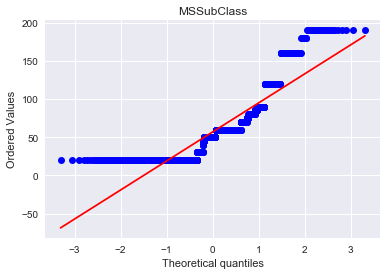

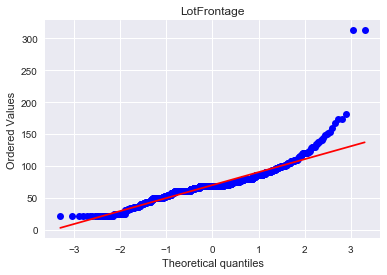

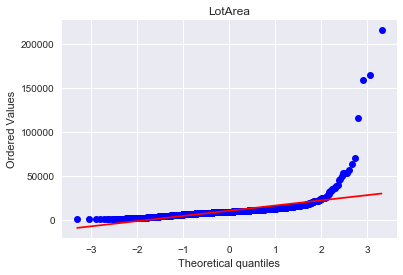

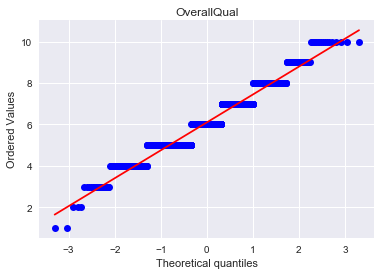

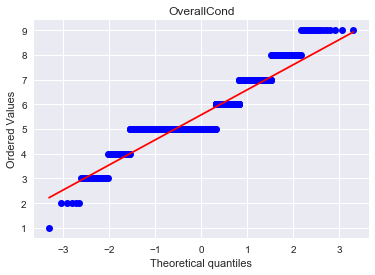

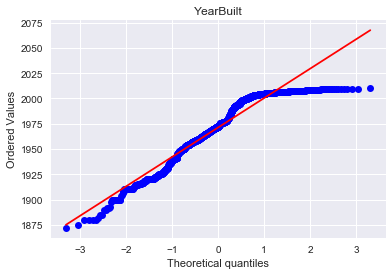

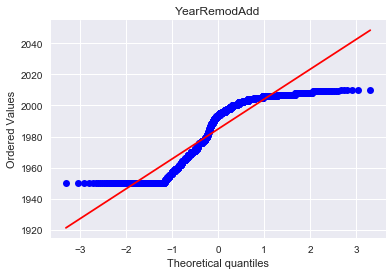

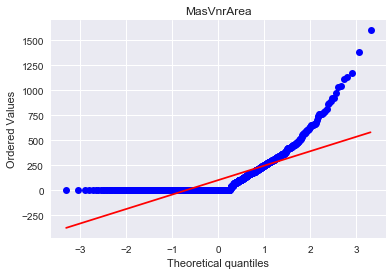

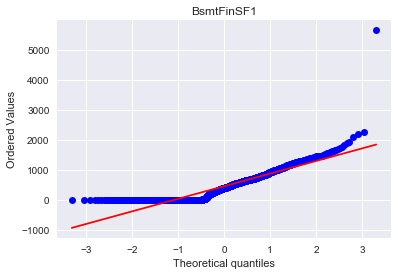

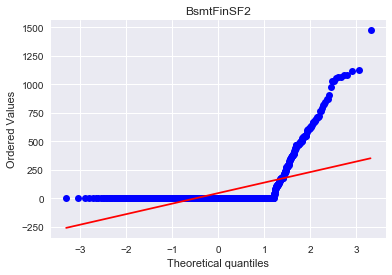

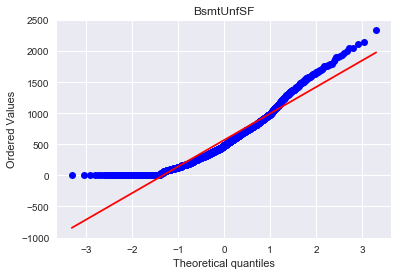

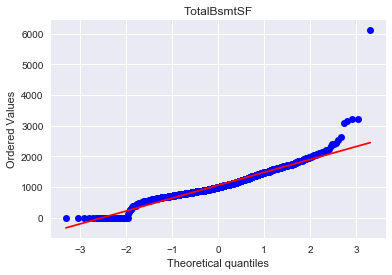

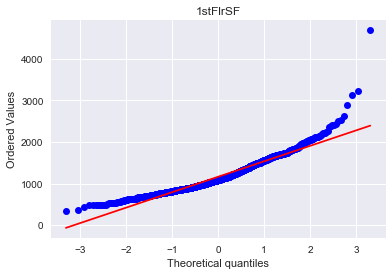

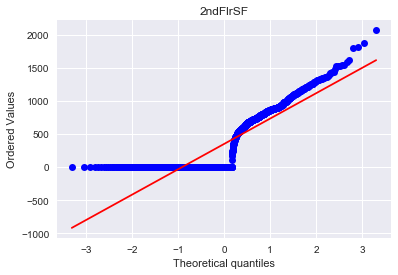

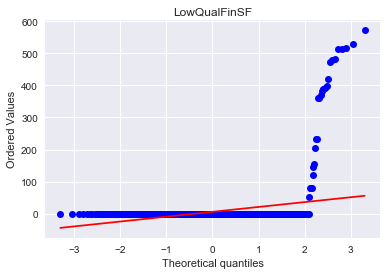

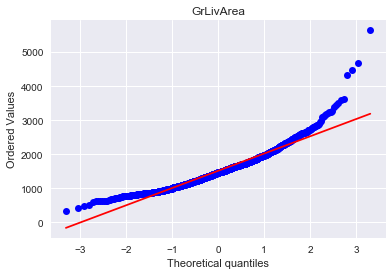

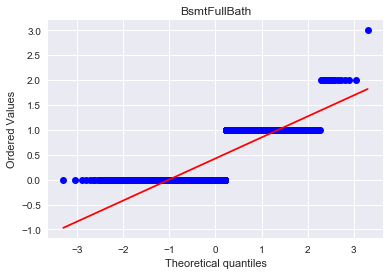

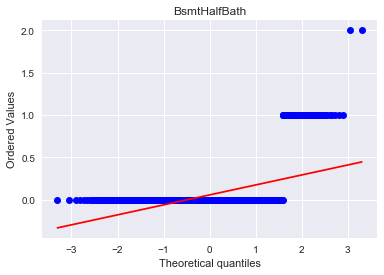

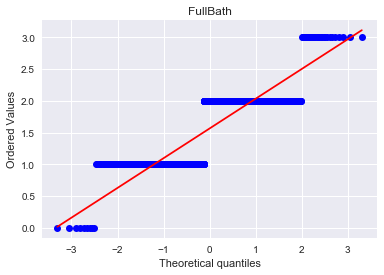

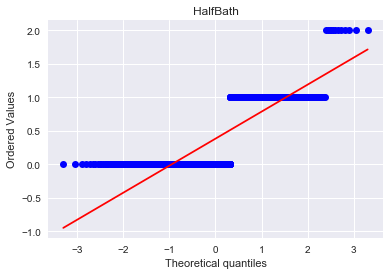

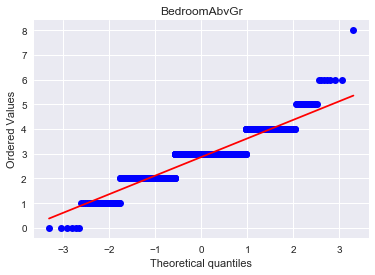

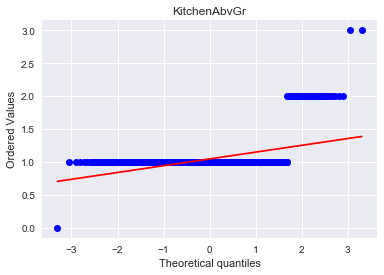

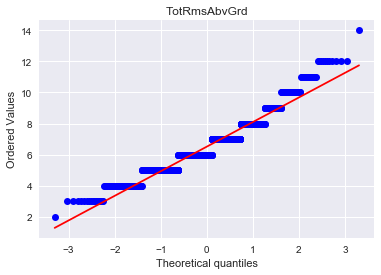

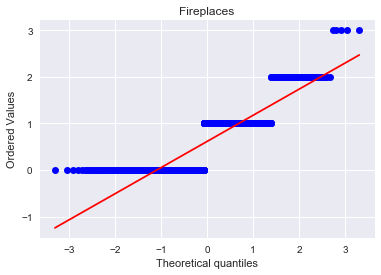

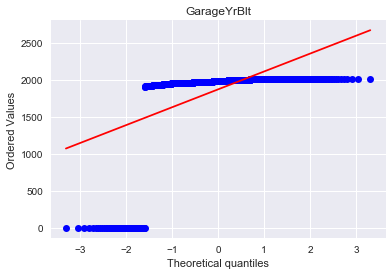

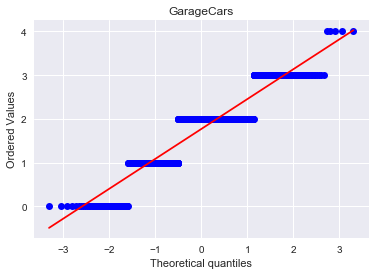

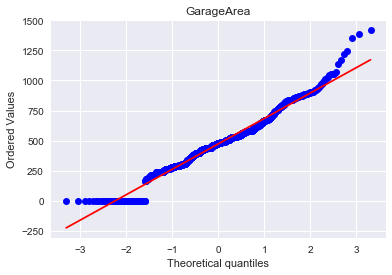

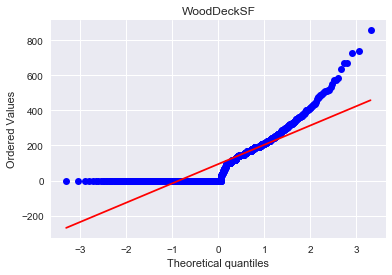

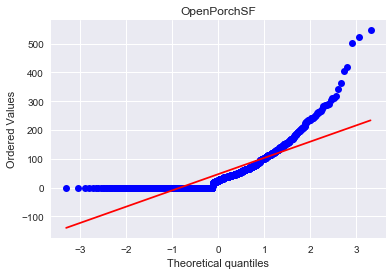

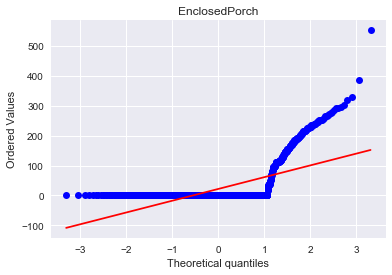

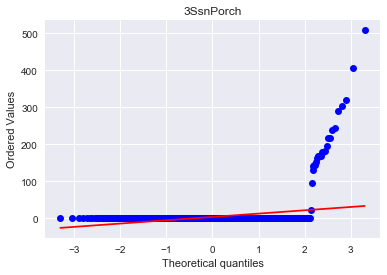

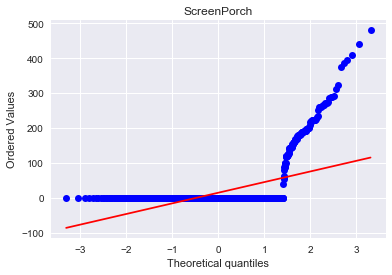

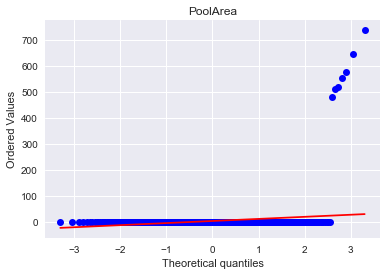

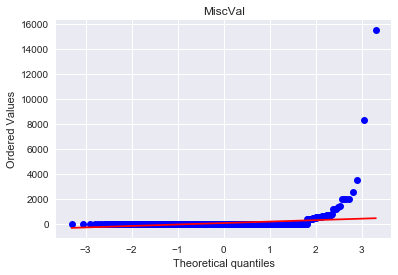

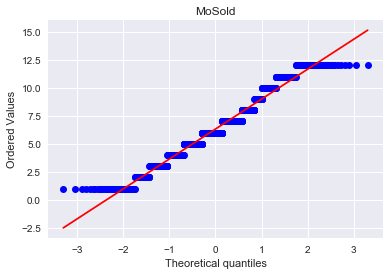

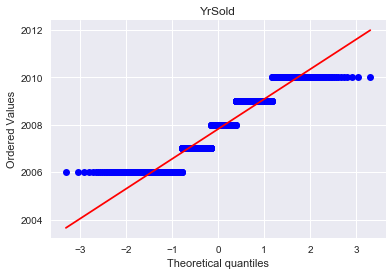

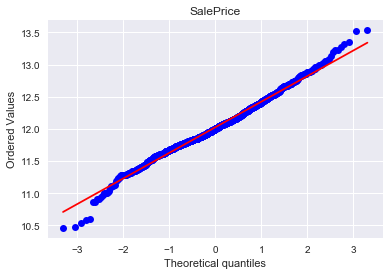

In [40]:
for x in numeric:
    
    fig = plt.figure()
    res = stats.probplot(train_data[x], plot=plt)
    plt.title(x)
    plt.show()

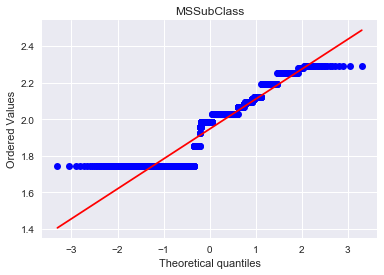

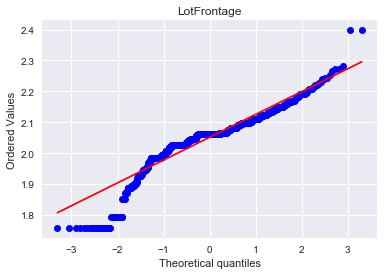

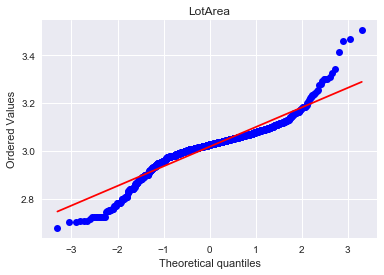

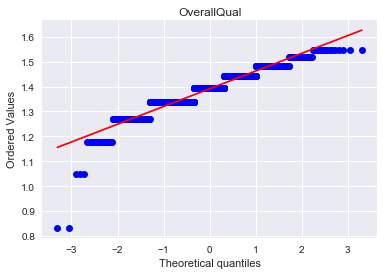

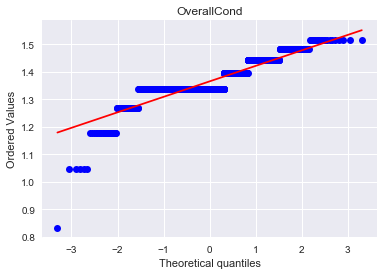

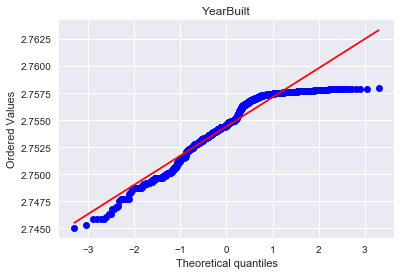

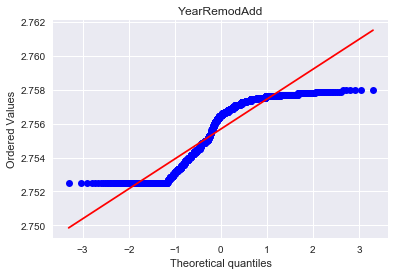

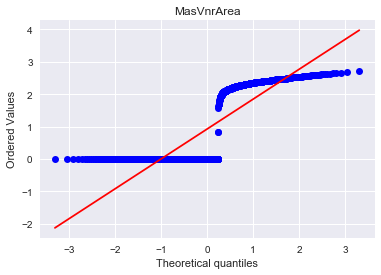

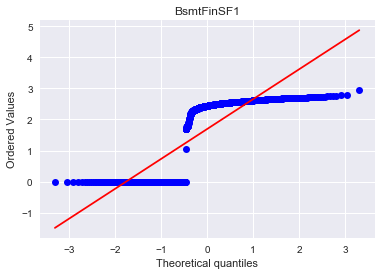

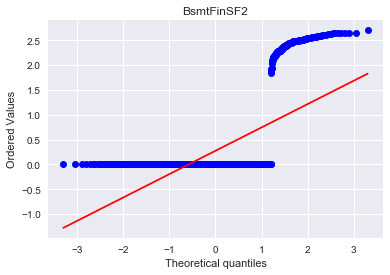

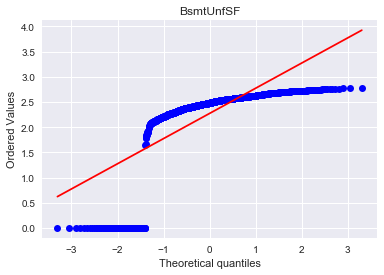

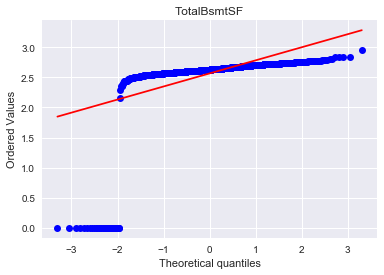

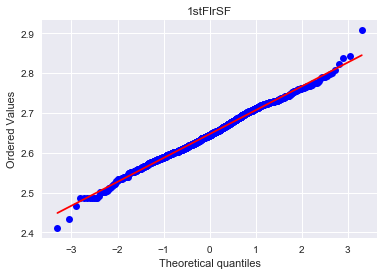

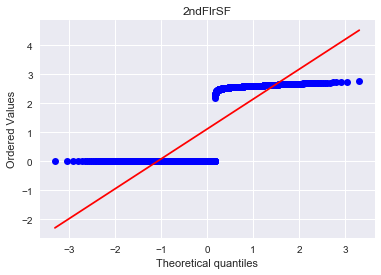

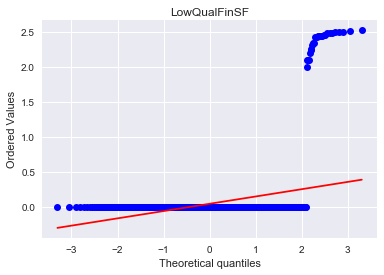

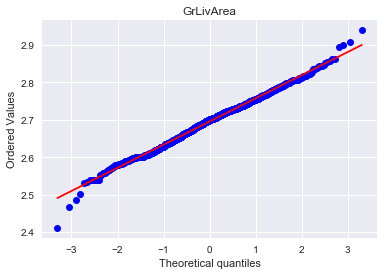

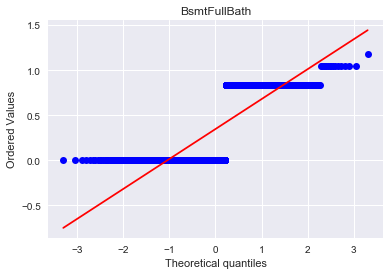

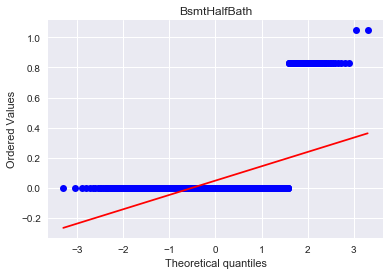

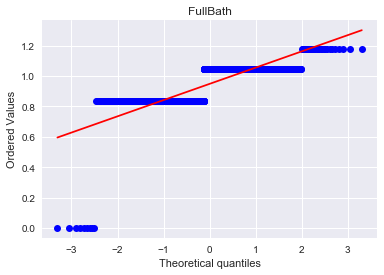

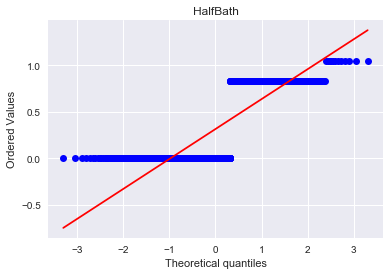

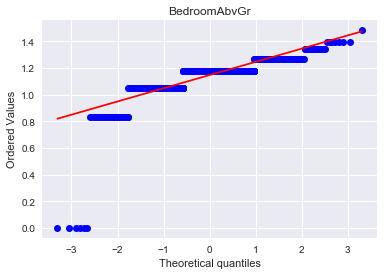

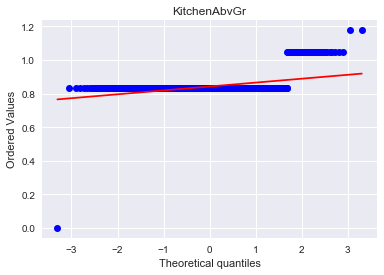

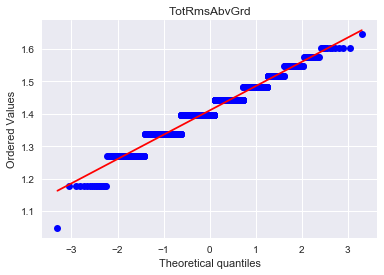

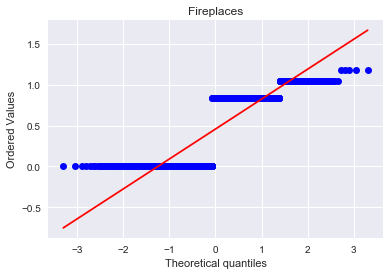

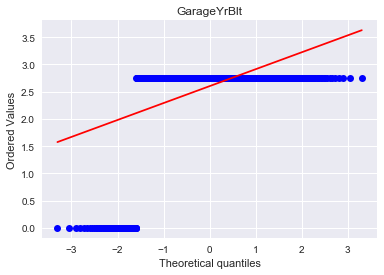

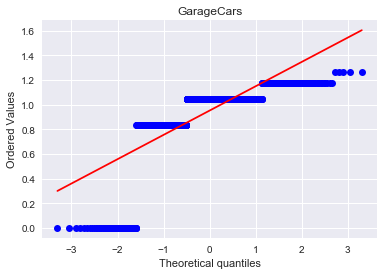

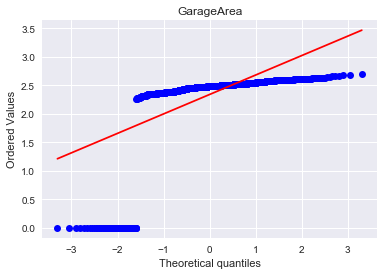

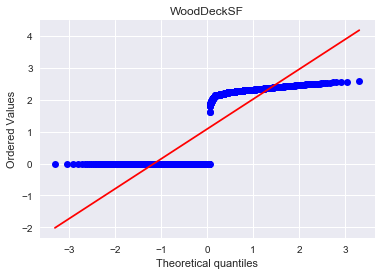

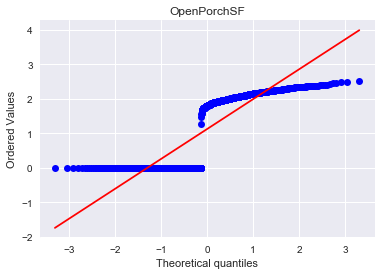

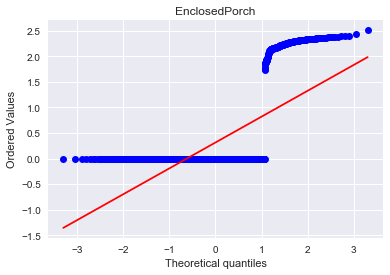

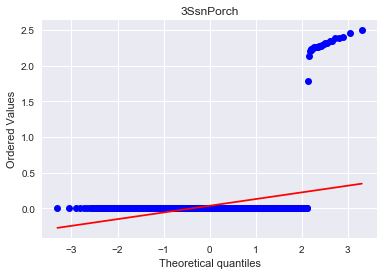

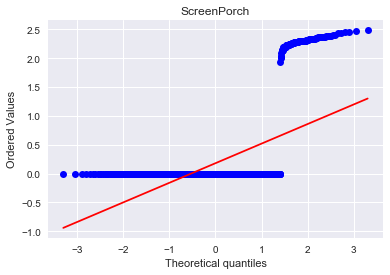

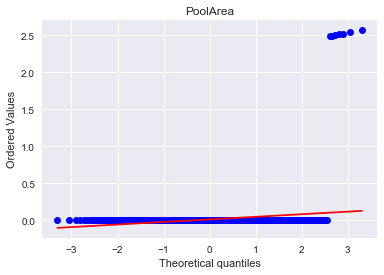

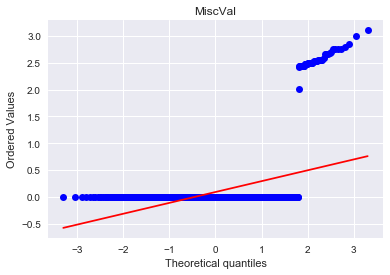

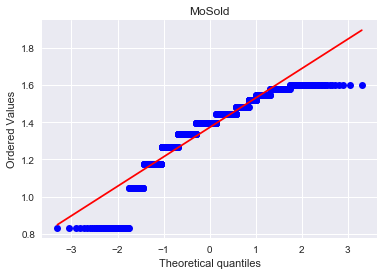

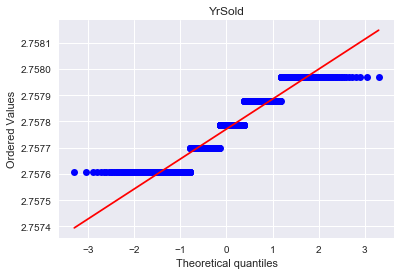

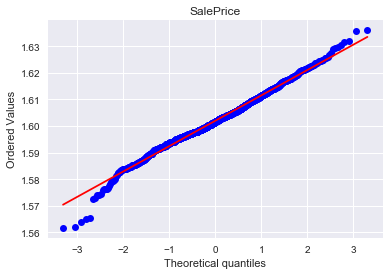

In [54]:
for x in numeric:
    
    fig = plt.figure()
    train_data[x]=np.sqrt(train_data[x])
    res = stats.probplot(train_data[x], plot=plt)
    plt.title(x)
    plt.show()